# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [1]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

### Check for missing values

In [3]:
# Your code to create a clustering solution
data.isnull().sum()

A    0
B    0
C    0
dtype: int64

In [4]:
data

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091
...,...,...,...
995,1.035455,1.916280,1.535641
996,3.479744,3.747277,3.038687
997,2.422571,1.771780,1.729732
998,-0.237440,-0.029278,0.077298


### PCA 2D representation


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#scale the data
scaled_features = MinMaxScaler().fit_transform(data)
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)

#create the 2 dimensional data (reduce)
features_2d

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       ...,
       [-0.13072154,  0.0767816 ],
       [ 0.43722666, -0.02364599],
       [-0.21179279,  0.02825676]])

### Visualize the data points 

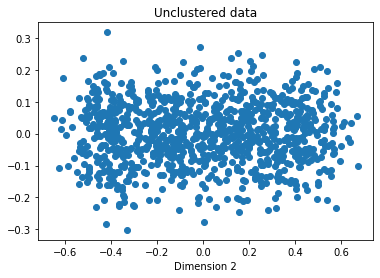

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.title('Unclustered data')
plt.xlabel('Dimension 1')
plt.xlabel('Dimension 2')
plt.show()

### Apply K-means elbow curve

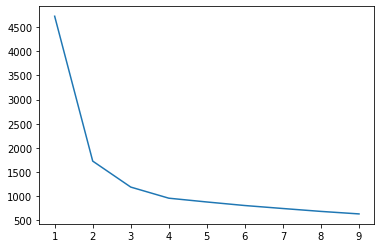

In [9]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

sse = []
for k in range(1,10):
    model = KMeans(n_clusters=k, random_state=0,n_init=100,max_iter=1000)
    model.fit(data)
    sse.append(model.inertia_)
#check this in my thesis 
plt.plot(range(1,10),sse)


In [10]:
data

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091
...,...,...,...
995,1.035455,1.916280,1.535641
996,3.479744,3.747277,3.038687
997,2.422571,1.771780,1.729732
998,-0.237440,-0.029278,0.077298


### Choose number of clusters and calculate them

In [11]:
kmeans = KMeans(n_clusters=4,n_init=500,max_iter=1500)
clusters = kmeans.fit_predict(data)
clusters

array([0, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 2, 2, 3, 3, 3, 1, 2, 3, 3, 0, 3,
       0, 0, 3, 2, 1, 0, 2, 3, 2, 0, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 1, 2,
       1, 0, 0, 1, 1, 3, 0, 2, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3,
       2, 3, 2, 1, 2, 3, 3, 1, 2, 3, 3, 3, 0, 2, 3, 2, 1, 2, 3, 1, 2, 3,
       3, 2, 2, 2, 1, 3, 2, 3, 1, 3, 1, 2, 3, 2, 1, 2, 3, 2, 1, 3, 3, 1,
       3, 2, 0, 0, 2, 1, 2, 1, 0, 2, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2, 2,
       2, 3, 2, 2, 3, 0, 3, 2, 0, 2, 2, 0, 1, 1, 3, 1, 3, 3, 1, 0, 0, 3,
       0, 2, 0, 3, 3, 3, 2, 0, 1, 1, 3, 2, 2, 0, 0, 1, 0, 2, 3, 1, 3, 2,
       2, 3, 3, 0, 3, 0, 2, 2, 3, 1, 0, 1, 1, 2, 2, 0, 2, 3, 1, 2, 3, 3,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 3, 1, 0, 1, 1, 2, 0, 1, 3, 3, 1, 0, 1,
       3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 3, 0, 2, 3, 0, 1, 1, 0, 1, 2, 1, 2,
       1, 3, 3, 2, 1, 0, 0, 3, 1, 3, 2, 2, 1, 1, 1, 0, 1, 0, 3, 1, 1, 3,
       0, 3, 2, 2, 2, 3, 1, 0, 3, 2, 0, 2, 1, 3, 3, 0, 1, 1, 2, 0, 0, 1,
       1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 3, 3, 2, 0, 1,

### Visualize results

In [16]:
clusters

array([0, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 2, 2, 3, 3, 3, 1, 2, 3, 3, 0, 3,
       0, 0, 3, 2, 1, 0, 2, 3, 2, 0, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 1, 2,
       1, 0, 0, 1, 1, 3, 0, 2, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3,
       2, 3, 2, 1, 2, 3, 3, 1, 2, 3, 3, 3, 0, 2, 3, 2, 1, 2, 3, 1, 2, 3,
       3, 2, 2, 2, 1, 3, 2, 3, 1, 3, 1, 2, 3, 2, 1, 2, 3, 2, 1, 3, 3, 1,
       3, 2, 0, 0, 2, 1, 2, 1, 0, 2, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2, 2,
       2, 3, 2, 2, 3, 0, 3, 2, 0, 2, 2, 0, 1, 1, 3, 1, 3, 3, 1, 0, 0, 3,
       0, 2, 0, 3, 3, 3, 2, 0, 1, 1, 3, 2, 2, 0, 0, 1, 0, 2, 3, 1, 3, 2,
       2, 3, 3, 0, 3, 0, 2, 2, 3, 1, 0, 1, 1, 2, 2, 0, 2, 3, 1, 2, 3, 3,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 3, 1, 0, 1, 1, 2, 0, 1, 3, 3, 1, 0, 1,
       3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 3, 0, 2, 3, 0, 1, 1, 0, 1, 2, 1, 2,
       1, 3, 3, 2, 1, 0, 0, 3, 1, 3, 2, 2, 1, 1, 1, 0, 1, 0, 3, 1, 1, 3,
       0, 3, 2, 2, 2, 3, 1, 0, 3, 2, 0, 2, 1, 3, 3, 0, 1, 1, 2, 0, 0, 1,
       1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 3, 3, 2, 0, 1,

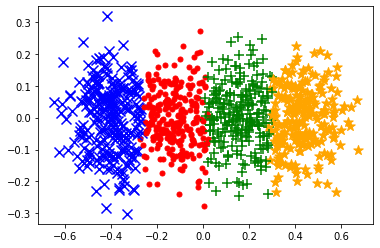

In [19]:
def plot_clusters(samples , clusters):
    markers_dic = {0:'*',1:'x',2:'+',3:'.'}
    colors_dic = {0:'orange',1:'blue',2:'green',3:'red'}
    colors = [colors_dic[x] for x in clusters]
    markers = [markers_dic[x] for x in clusters]
    # print(colors)
    for i in range(len(clusters)):
        # plt.scatter(samples[i][0],samples[i][1])
        plt.scatter(samples[i][0], samples[i][1], color = colors[i], marker=markers[i], s=100) 
        # print(samples[i][0])
plot_clusters(features_2d, clusters)